___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 4. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 5. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [9]:
!pip install scikit-plot
!pip install prince
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 7.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.6 MB/s eta 0:00:00


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pprint import pprint
from scipy.stats import chi2_contingency

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
from scikitplot.metrics import plot_roc, plot_precision_recall ,roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_validate
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import optuna
%matplotlib inline
import prince
from prince import FAMD


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mounted with google drive
#from google.colab import drive
#drive.mount('/content/gdrive')

In [13]:
#load the dataset
path = "/content/HR_Dataset.csv"
df = pd.read_csv(path)

In [14]:
df = pd.read_csv('HR_Dataset.csv')
df.head()


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

## 1. Exploratory Data Analysis

In [15]:
df.shape

(14999, 10)

We have 10 columns and 14999 rows

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [17]:
# remove space from column name and to lowercase to match the rest
df.rename(columns={'Departments ': 'departments'}, inplace=True)

In [18]:
df.describe().T

count        mean        std    min     25%     50%  \
satisfaction_level     14999.0    0.612834   0.248631   0.09    0.44    0.64   
last_evaluation        14999.0    0.716102   0.171169   0.36    0.56    0.72   
number_project         14999.0    3.803054   1.232592   2.00    3.00    4.00   
average_montly_hours   14999.0  201.050337  49.943099  96.00  156.00  200.00   
time_spend_company     14999.0    3.498233   1.460136   2.00    3.00    3.00   
Work_accident          14999.0    0.144610   0.351719   0.00    0.00    0.00   
left                   14999.0    0.238083   0.425924   0.00    0.00    0.00   
promotion_last_5years  14999.0    0.021268   0.144281   0.00    0.00    0.00   

                          75%    max  
satisfaction_level       0.82    1.0  
last_evaluation          0.87    1.0  
number_project           5.00    7.0  
average_montly_hours   245.00  310.0  
time_spend_company       4.00   10.0  
Work_accident            0.00    1.0  
left                     0.00    1.0  
promotion_last_5years    0.00    1.0

We have 5 encoded categorical columns.

In [19]:
cat_cols = df.select_dtypes(include=['object']).columns # cat features
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
pprint(cat_cols)
print("Numerical Variables:")
pprint(num_cols)

Categorical Variables:
Index(['departments', 'salary'], dtype='object')
Numerical Variables:
['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']


In [20]:
# checking duplicated values
df.duplicated().sum()

3008

In [21]:
# dropping them
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [22]:
# checking null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

In [23]:
# taking a look at departments column
df['departments'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: departments, dtype: int64

## 2. Data Visualization

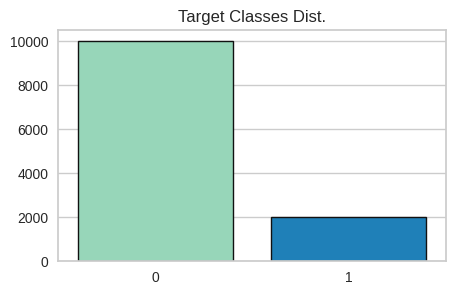

In [24]:
c = df['left'].value_counts()

# visualizing our target distribution
plt.figure(figsize=(5, 3))
sns.barplot(x=c.index, y=c.values,
            saturation=1, edgecolor='k',
            linewidth=1, palette='YlGnBu')
plt.title(f'Target Classes Dist.')
plt.show()

The target classes are not balanced, we must handle the imbalnced issue. <br>
Common approaches:<br>
•	Focus on recall, precision, F1 scores for each class or (macro average)<br>
•	Use the class weight parameter to assign higher weights for the minority class<br>
During the modeling process we will try to improve the performance for class 1 since it has more value in this business problem since employees churn will introduce unexpected costs.

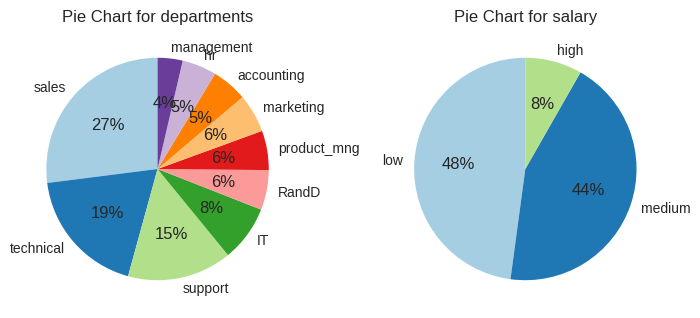

In [25]:
#columns with non-numerical data types
non_numerical_columns = df.select_dtypes(exclude='number').columns

plt.figure(figsize=(18, 15))

for i, column in enumerate(non_numerical_columns):
    plt.subplot(2, 5, i + 1)

    value_counts = df[column].value_counts()

    plt.pie(value_counts, labels=value_counts.index, autopct='%1.0f%%',
            startangle=90, colors=sns.color_palette('Paired'))
    plt.title(f'Pie Chart for {column}')

plt.tight_layout()
plt.show()

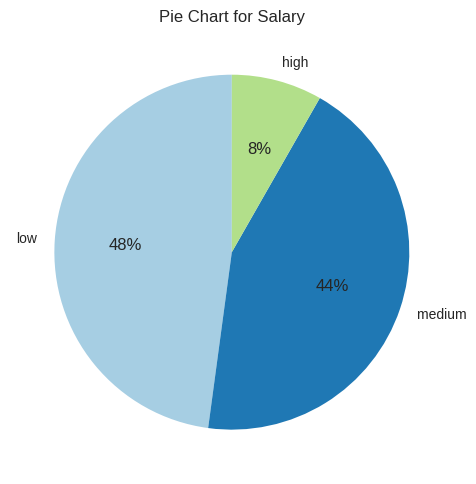

In [26]:
plt.figure(figsize=(8, 5))
value_counts = df['salary'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.0f%%',
            startangle=90, colors=sns.color_palette('Paired'))
plt.title(f'Pie Chart for Salary')
plt.tight_layout()
plt.show()

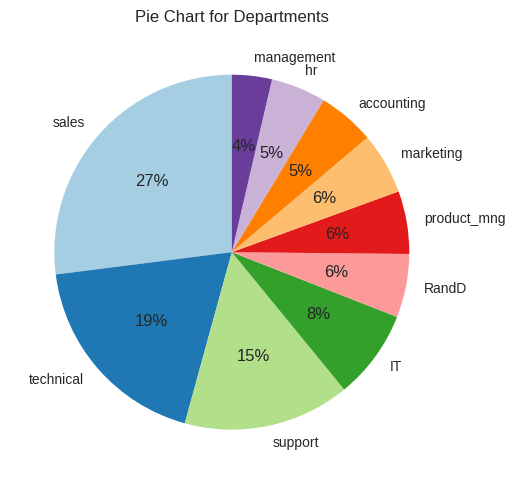

In [27]:
plt.figure(figsize=(8, 5))
value_counts = df['departments'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.0f%%',
            startangle=90, colors=sns.color_palette('Paired'))
plt.title(f'Pie Chart for Departments')
plt.tight_layout()
plt.show()

In [28]:
# storing numerical including encoded columns
cols = ['satisfaction_level',
        'last_evaluation',
        'number_project',
        'average_montly_hours',
        'time_spend_company',
        'Work_accident',
        'promotion_last_5years']

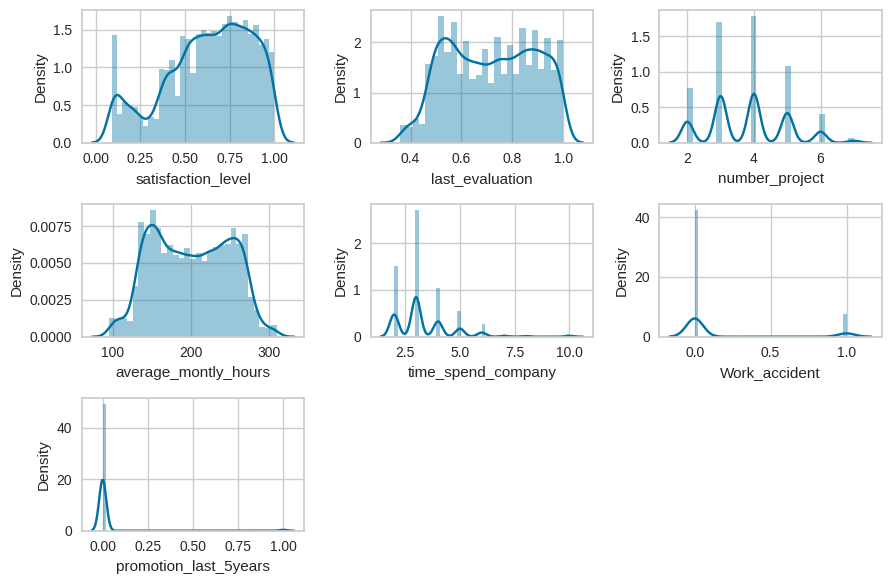

In [29]:
plt.figure(figsize=(9, 6))
for i, column in enumerate(df[cols] , 1):
    plt.subplot(3,3,i)
    sns.distplot(df[column])
    plt.tight_layout()

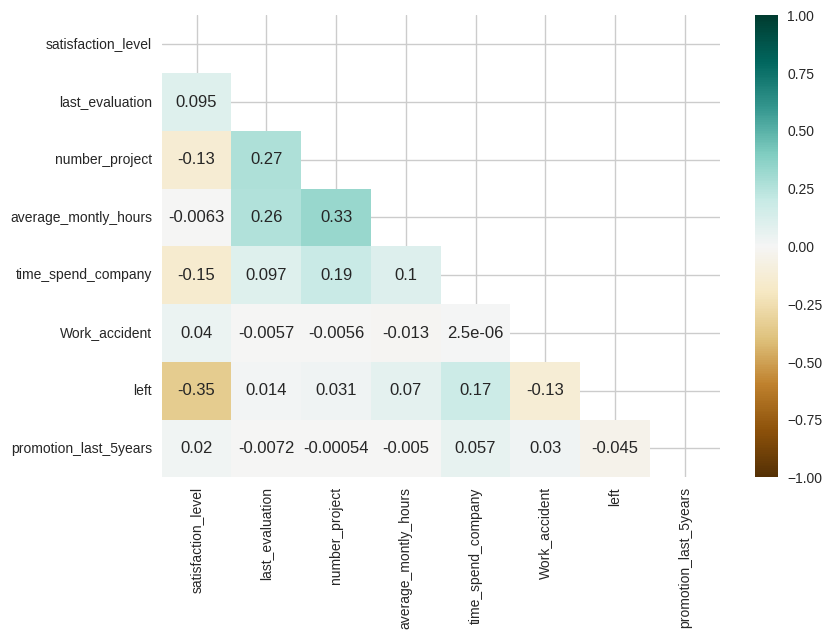

In [30]:
plt.figure(figsize=(9, 6))
mask = np.triu(np.ones_like(df.corr(numeric_only=True))) #mask for the upper half
sns.heatmap(df.corr(numeric_only=True), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');

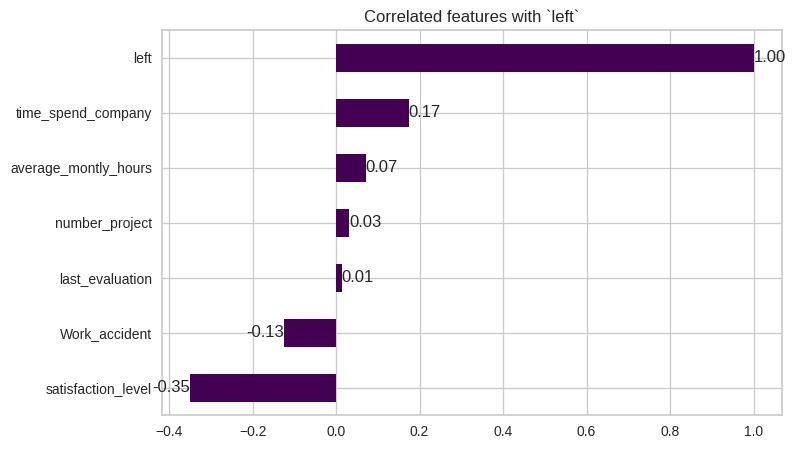

In [31]:
#correlated features with `left` vs numaric columns
plt.figure(figsize=(8, 5))
ax = df.corr(numeric_only=True)['left'][:-1].sort_values().plot(kind='barh', colormap='viridis')
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.title('Correlated features with `left`');


-  `>` .5 or < -.5       high association

- .3 to .5 or -.3 to -.5  moderate association

- .1 to .3 or -.1 to -.3  low association

- -1 to 1   little if any association

Cramer’s V for categorical columns

In [32]:
cat = ['Work_accident',
       'promotion_last_5years',
       'departments',
       'salary',
       'number_project',
       'time_spend_company',
       ]

In [33]:
"""
This segment of code loops through the cat list above
to calculates Crammar's v and store it for later comparison
"""
v_values = []

for column in cat:
    tb = pd.crosstab(df[column], df['left'])
    chi2, _, _, _ = chi2_contingency(tb)
    n = tb.sum().sum()
    v = np.sqrt(chi2 / (n * min(tb.shape) - 1))
    v_values.append((column, v))

v_values.sort(key=lambda x: x[1], reverse=True)

table = pd.DataFrame(v_values,
                     columns=['column', 'v'])

In [34]:
table.style.background_gradient(cmap='Blues')

Cramér's V is used to measure of association between two categorical variables. It's based on the chi-square and is mostly used to assess the strength of association between two categorical variables.

In [35]:
n = ['satisfaction_level','last_evaluation', 'average_montly_hours']

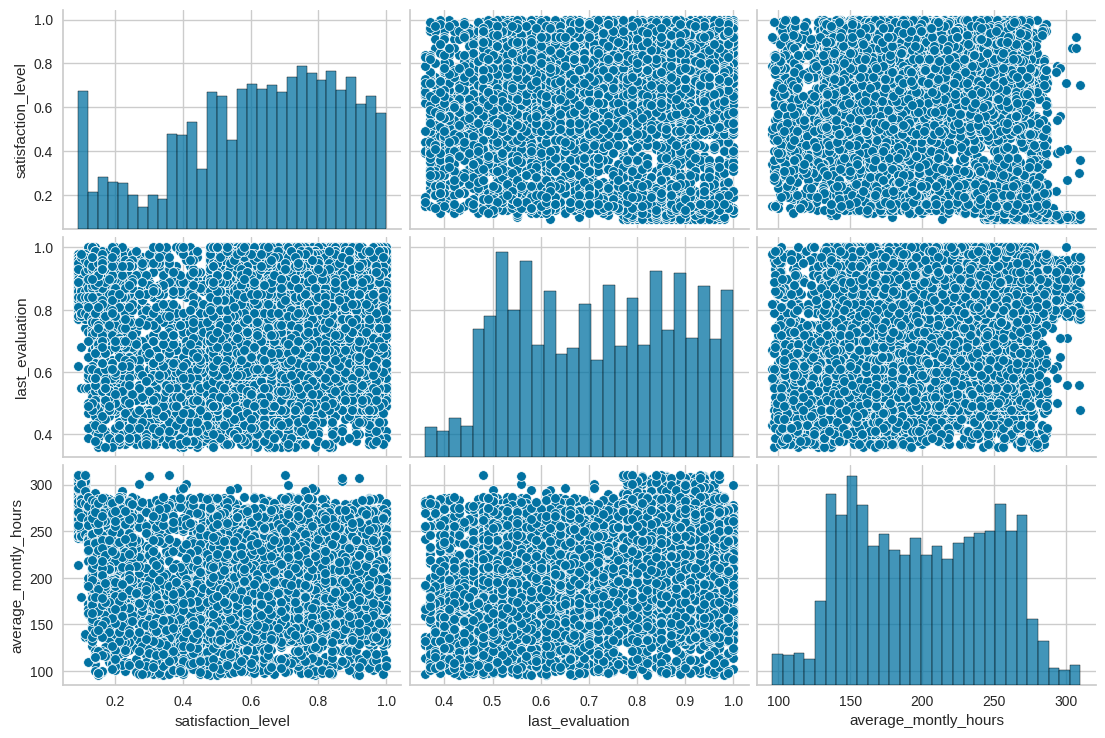

In [36]:
sns.pairplot(df[n] ,aspect=1.5);

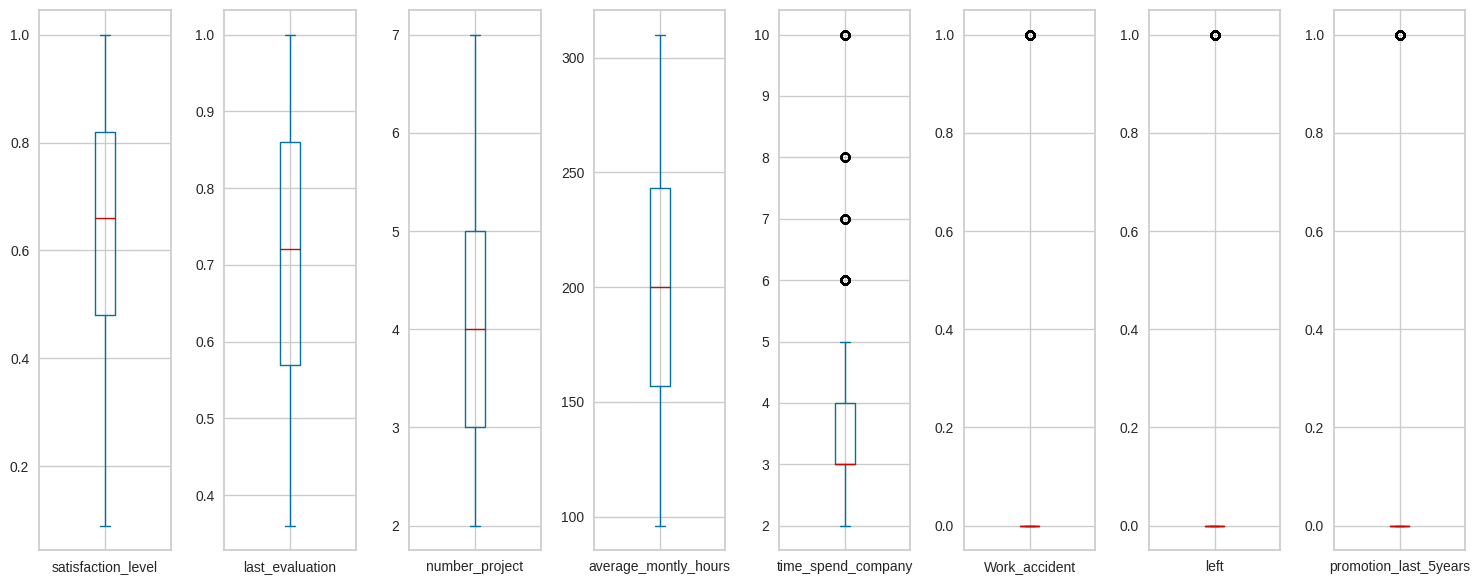

In [37]:
df.plot( kind="box", subplots=True, figsize=(15, 6))
plt.tight_layout();

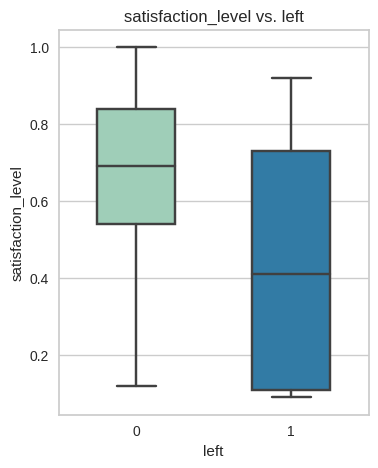

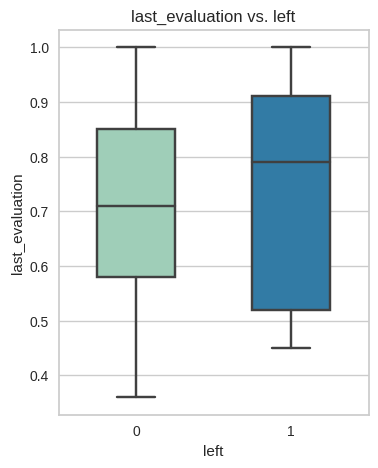

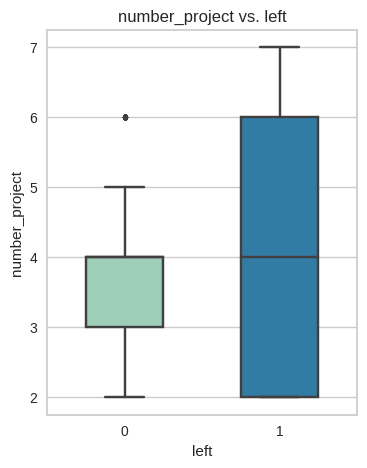

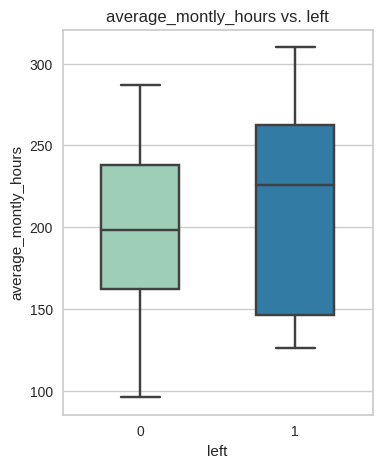

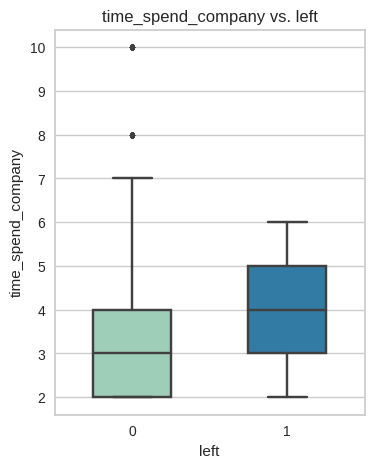

In [38]:
# store numerical columns names except target feature and categorical features
columns = list(df.select_dtypes(include='number').columns)

columns.remove('left') # binary
columns.remove('Work_accident') # binary
columns.remove('promotion_last_5years') #binary

for column in columns:
    plt.figure(figsize=(4, 5))
    sns.boxplot(data=df, width=0.5, fliersize=3, y=column,
                x='left', palette = 'YlGnBu')
    plt.title(f'{column} vs. left')
    plt.show()
# No many outlier

In [39]:
# visualizing categorical features
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','departments','salary']

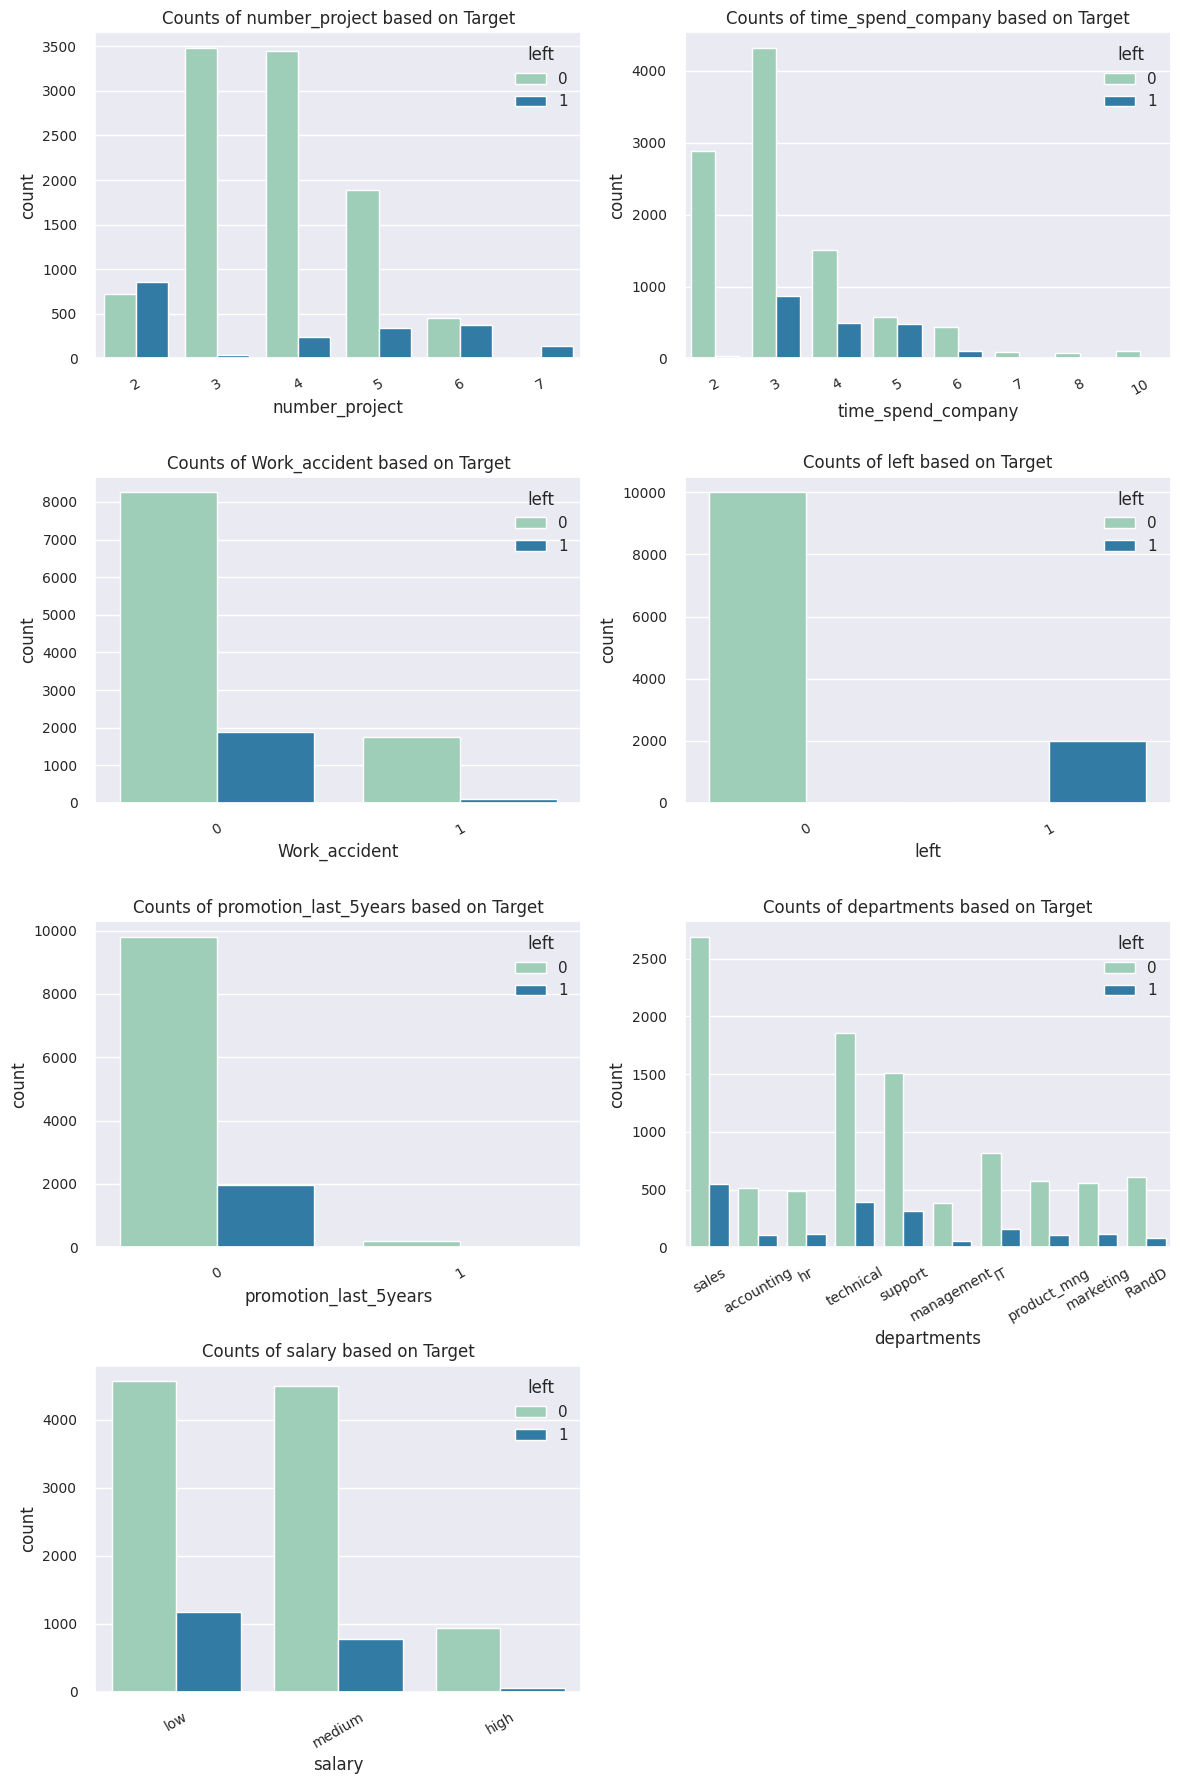

In [40]:
# count of fetures based on target
sns.set(style="darkgrid")

fig, axes = plt.subplots(figsize=(12, 18))
plt.subplots_adjust(hspace=0.6, wspace=0.3)

for i, j in enumerate(df[features]):
    ax = plt.subplot(4, 2, i + 1)

    ax.tick_params(axis='both', which='major', labelsize=10)
    sns.countplot(x=j, data=df, hue='left', palette='YlGnBu')
    plt.xticks(rotation=30,ha='center')
    plt.title(f"Counts of {j} based on Target", fontsize=12)

plt.tight_layout()
plt.show()

In [41]:
df[df['time_spend_company'] > 7]['departments'].value_counts()

sales          53
management     43
support        19
marketing      16
technical      15
IT             13
accounting     12
product_mng     9
RandD           5
hr              3
Name: departments, dtype: int64

In [42]:
df[df['number_project'] > 5]['departments'].value_counts()

sales          262
technical      206
support        139
IT              73
product_mng     61
RandD           56
accounting      51
marketing       46
hr              44
management      33
Name: departments, dtype: int64

In [43]:
df[df['left'] == 1]['promotion_last_5years'].value_counts()

0    1983
1       8
Name: promotion_last_5years, dtype: int64

most employees that had promotion do not left

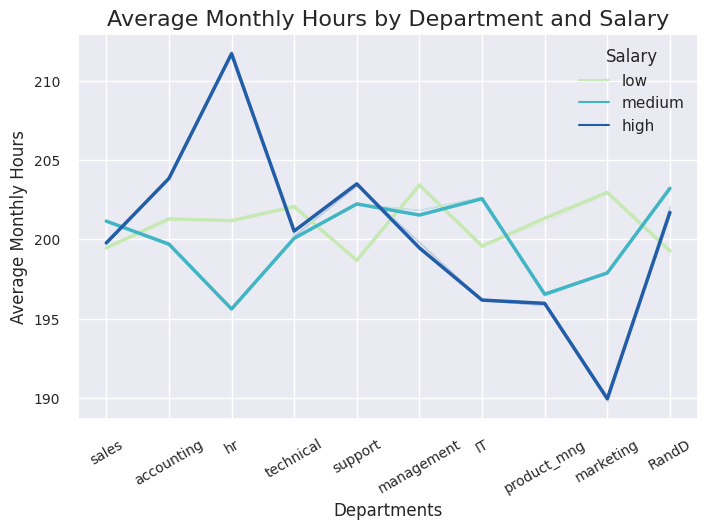

In [44]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))
sns.lineplot(x='departments', y='average_montly_hours',
             hue='salary', data=df, ci=0, palette='YlGnBu', linewidth=2.5)
plt.title('Average Monthly Hours by Department and Salary', fontsize=16)
plt.xlabel('Departments', fontsize=12)
plt.ylabel('Average Monthly Hours', fontsize=12)
plt.legend(bbox_to_anchor=(1.00, 1), title='Salary')
plt.xticks(rotation=30, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [45]:
df[df['number_project'] == 7]["left"].value_counts()

1    145
Name: left, dtype: int64

All employees that have had 7 project had left the company

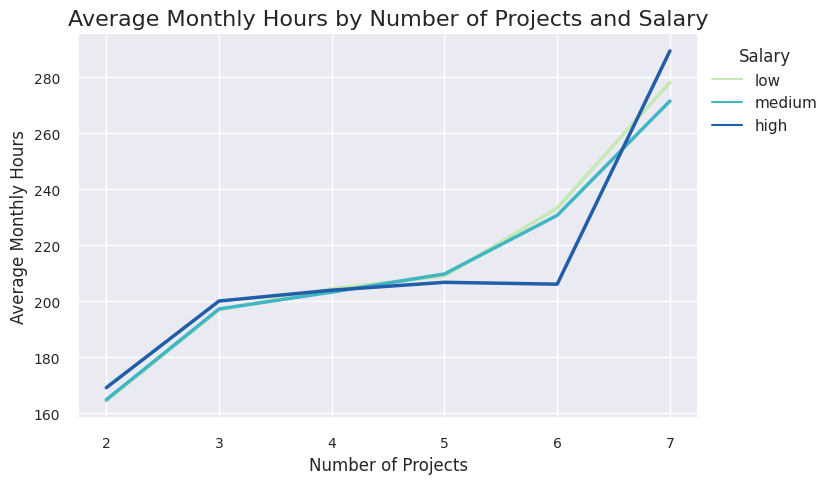

In [46]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))
sns.lineplot(x='number_project', y='average_montly_hours',
             hue='salary', data=df, ci=0, palette='YlGnBu', linewidth=2.5)
plt.title('Average Monthly Hours by Number of Projects and Salary', fontsize=16)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Average Monthly Hours', fontsize=12)
plt.legend(bbox_to_anchor=(1.00, 1), title='Salary')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [47]:
df[df['number_project'] == 7][df['left'] == 1]["salary"].value_counts()

low       82
medium    61
high       2
Name: salary, dtype: int64

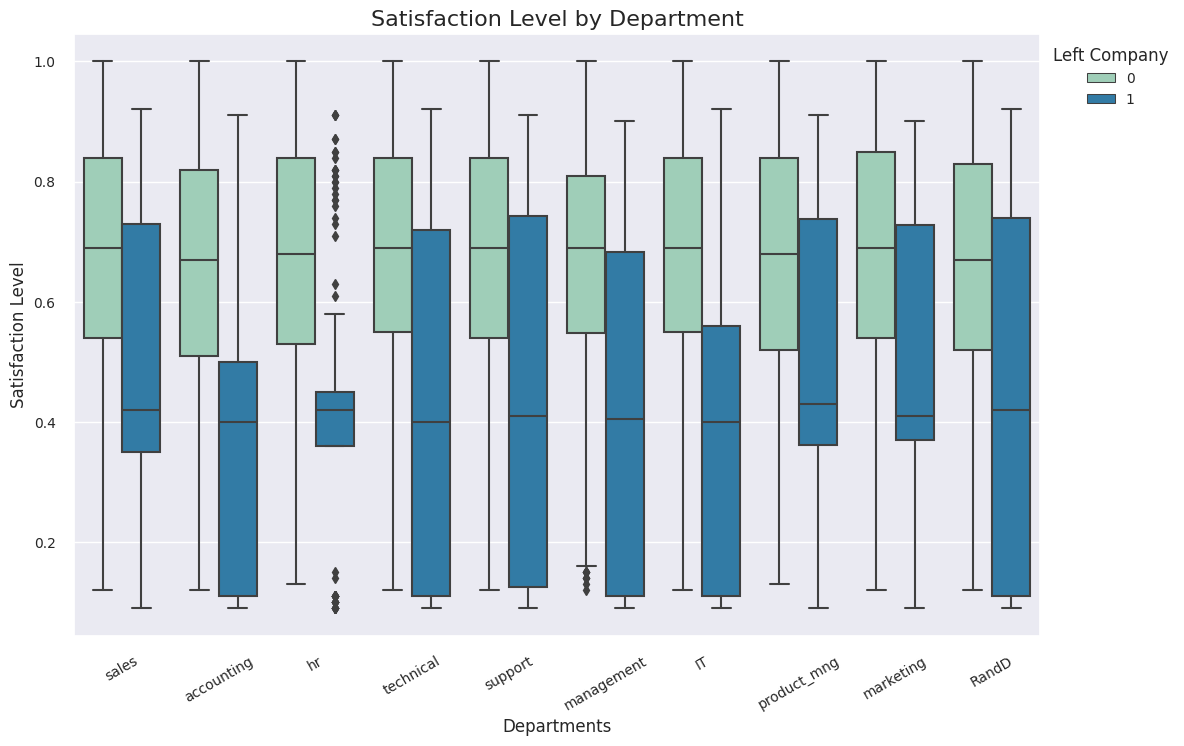

In [48]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(x='departments', y='satisfaction_level',
            hue='left', data=df, palette='YlGnBu')
plt.title('Satisfaction Level by Department', fontsize=16)
plt.xlabel('Departments', fontsize=12)
plt.ylabel('Satisfaction Level', fontsize=12)
legend = plt.legend(title='Left Company', fontsize=10, title_fontsize=12, loc='upper left',
                    bbox_to_anchor=(1.0, 1), facecolor='white')
legend.get_frame().set_linewidth(0)
plt.xticks(rotation=30, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [49]:
hr_outliers = df[(df['departments'] == 'hr') & (df['satisfaction_level'] > 0.5) & (df['left'] == 1)]

In [50]:
hr_outliers.head()

satisfaction_level  last_evaluation  number_project  \
34                 0.84             0.87               4   
108                0.71             0.87               3   
228                0.85             0.95               5   
261                0.82             0.97               5   
379                0.77             0.93               4   

     average_montly_hours  time_spend_company  Work_accident  left  \
34                    246                   6              0     1   
108                   177                   4              0     1   
228                   236                   5              0     1   
261                   263                   5              0     1   
379                   231                   5              0     1   

     promotion_last_5years departments  salary  
34                       0          hr     low  
108                      0          hr  medium  
228                      0          hr     low  
261                      0          hr  medium  
379                      0          hr  medium

In [51]:
hr_outliers.groupby(['salary','time_spend_company','promotion_last_5years']).mean()['last_evaluation'].unstack()

promotion_last_5years             0
salary time_spend_company          
low    3                   0.665000
       4                   0.720000
       5                   0.953636
       6                   0.935000
medium 3                   0.930000
       4                   0.875000
       5                   0.922500
       6                   0.803333

In [52]:
old_employees = df[(df['time_spend_company'] >= 5) & (df['left'] == 1)]
old_employees.shape

(591, 10)

In [53]:
old_employees.groupby(['salary','time_spend_company','promotion_last_5years']).mean()['last_evaluation'].unstack()

promotion_last_5years             0    1
salary time_spend_company               
high   5                   0.826429  NaN
low    5                   0.908132  NaN
       6                   0.908209  NaN
medium 5                   0.892268  1.0
       6                   0.910000  NaN

# Insights from EDA:

* Based on the Crammer's V test the number of projects assigned to an employee is highly associated with the leaving the company, according to the analysis; all employees who have been assigned with 7 projects have left which may be due to much workload pressure.

* In addition, there is an association with the years experince at the company, and according to the analysis employees who spent more than 5 years at the company and did not get promotion had left.


# Preprocessing of Data

## Feature Selection using FAMD

#### Preprocessing for FAMD

In [54]:
df2 =df.drop('left',axis=1)

In [55]:
scaler = StandardScaler()

In [56]:
df_scaled = scaler.fit_transform(df2.drop(columns=['departments', 'Work_accident', 'promotion_last_5years','salary','number_project', 'time_spend_company']))

In [57]:
df_scaled= pd.DataFrame(df_scaled)

In [58]:
df_scaled.head()

0         1         2
0 -1.035668 -1.108990 -0.892208
1  0.706637  0.851380  1.262709
2 -2.155721  0.970190  1.467939
3  0.374770  0.910785  0.462311
4 -1.077151 -1.168396 -0.851162

In [59]:
df_scaled.describe().T

count          mean       std       min       25%       50%       75%  \
0  11991.0 -1.232532e-16  1.000042 -2.238688 -0.620833  0.125869  0.789604   
1  11991.0 -8.319590e-16  1.000042 -2.118878 -0.871370  0.019708  0.851380   
2  11991.0 -2.441361e-16  1.000042 -2.144112 -0.892208 -0.009718  0.872772   

        max  
0  1.536306  
1  1.683052  
2  2.247814

In [60]:
famd = FAMD(n_components=3, random_state=42) # is most proper

In [61]:
df_scaled = pd.DataFrame(df2)

In [62]:
df_famd = famd.fit_transform(df_scaled)

In [63]:
df_famd.head()

component         0         1         2
0         -1.497521  5.081133 -0.527538
1          1.439709 -1.176549 -2.161325
2          8.430868  2.900355  1.623292
3          2.071908 -2.872975  1.158924
4         -1.236605  5.712880  0.022103

In [64]:
df_famd.columns = ['component_1', 'component_2', 'component_3']

In [65]:
df_famd.head()

component_1  component_2  component_3
0    -1.497521     5.081133    -0.527538
1     1.439709    -1.176549    -2.161325
2     8.430868     2.900355     1.623292
3     2.071908    -2.872975     1.158924
4    -1.236605     5.712880     0.022103

## 3. Cluster Analysis

### Kmeans

Because we already know the true labels are in two clusters, we will try to find the best model that segments the two clusters

In [66]:
K_mean= df_famd.copy()

In [67]:
K_mean.head()

component_1  component_2  component_3
0    -1.497521     5.081133    -0.527538
1     1.439709    -1.176549    -2.161325
2     8.430868     2.900355     1.623292
3     2.071908    -2.872975     1.158924
4    -1.236605     5.712880     0.022103

In [68]:
# code from LABS
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):
    if not isinstance(X, np.ndarray):
      X=X.values
    sample_size = int(X.shape[0] * ratio)
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0]
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    w_distances = w_distances[: , 1]
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    H = u_sum/ (u_sum + w_sum)
    return H




In [69]:
hopkins(K_mean, 0.05)

0.9317954146061356

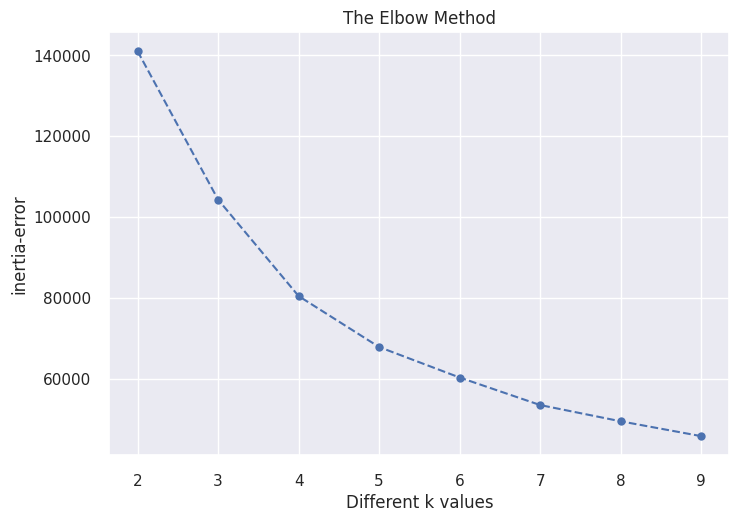

In [70]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(K_mean)
    ssd.append(model.inertia_)
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("The Elbow Method");

In [71]:
-pd.Series(ssd).diff()

0             NaN
1    36703.322065
2    23846.523393
3    12603.514969
4     7537.295007
5     6807.258190
6     4016.573958
7     3671.321582
dtype: float64

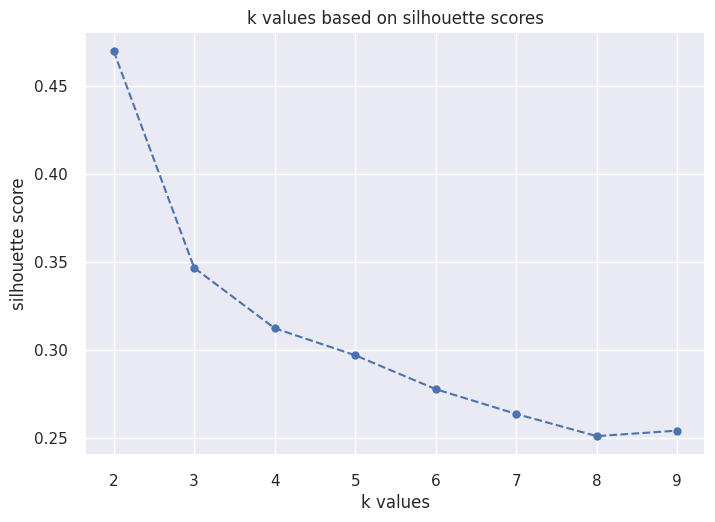

In [72]:
scores = []
for n in K:
    kmeans = KMeans(n_clusters = n, random_state = 42)
    kmeans.fit(K_mean)
    cluster_labels = kmeans.labels_
        # silhouette score
    silhouette_avg = silhouette_score(K_mean, cluster_labels)
    scores.append(silhouette_avg)
plt.plot(K, scores, 'bo--')
plt.xlabel('k values')
plt.ylabel('silhouette score')
plt.title('k values based on silhouette scores');

In [73]:
kmeans_model = KMeans(n_clusters = 3, random_state=42)
kmeans_model.fit(K_mean)

KMeans(n_clusters=3, random_state=42)

In [74]:
K_mean.head()

component_1  component_2  component_3
0    -1.497521     5.081133    -0.527538
1     1.439709    -1.176549    -2.161325
2     8.430868     2.900355     1.623292
3     2.071908    -2.872975     1.158924
4    -1.236605     5.712880     0.022103

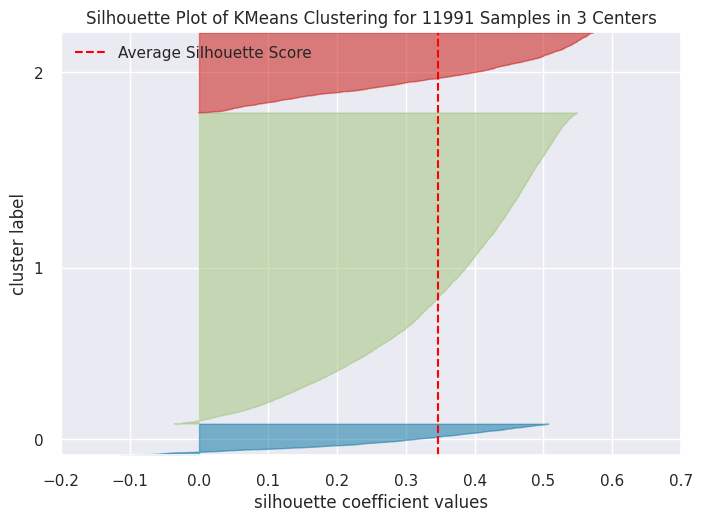

In [75]:
visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick')
visualizer.fit(K_mean)
visualizer.show();

In [76]:
clusters = kmeans_model.labels_
clusters

array([2, 1, 0, ..., 1, 1, 1], dtype=int32)

In [77]:
centers = kmeans_model.cluster_centers_
centers


array([[ 6.58750754,  0.64140696,  0.55278436],
       [-0.36275152, -0.96088636, -0.08638063],
       [-1.18037718,  3.48259248,  0.11838195]])

In [78]:
K_mean['lables']=clusters
K_mean.head()

component_1  component_2  component_3  lables
0    -1.497521     5.081133    -0.527538       2
1     1.439709    -1.176549    -2.161325       1
2     8.430868     2.900355     1.623292       0
3     2.071908    -2.872975     1.158924       1
4    -1.236605     5.712880     0.022103       2

In [79]:
K_mean.head()

component_1  component_2  component_3  lables
0    -1.497521     5.081133    -0.527538       2
1     1.439709    -1.176549    -2.161325       1
2     8.430868     2.900355     1.623292       0
3     2.071908    -2.872975     1.158924       1
4    -1.236605     5.712880     0.022103       2

In [80]:
import plotly.express as px
fig = px.scatter_3d(K_mean,
                    x='component_1',
                    y='component_2',
                    z='component_3',
                    color='lables'
                   )
fig.update_coloraxes(showscale=False)
fig.show();

In [81]:
K_mean2=df.copy()
K_mean2['lables']=K_mean['lables']
K_mean2.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years departments  \
0                   3              0     1                      0       sales   
1                   6              0     1                      0       sales   
2                   4              0     1                      0       sales   
3                   5              0     1                      0       sales   
4                   3              0     1                      0       sales   

   salary  lables  
0     low       2  
1  medium       1  
2  medium       0  
3     low       1  
4     low       2

## AgglomerativeClustering

In [82]:
hc_df_famd=df_famd.copy()

In [83]:
hc_df_famd.head()

component_1  component_2  component_3
0    -1.497521     5.081133    -0.527538
1     1.439709    -1.176549    -2.161325
2     8.430868     2.900355     1.623292
3     2.071908    -2.872975     1.158924
4    -1.236605     5.712880     0.022103

In [84]:
hc_ward = linkage(hc_df_famd, method = "ward")
hc_complete = linkage(hc_df_famd, "complete")
hc_average = linkage(hc_df_famd, "average")
hc_single = linkage(hc_df_famd, "single")

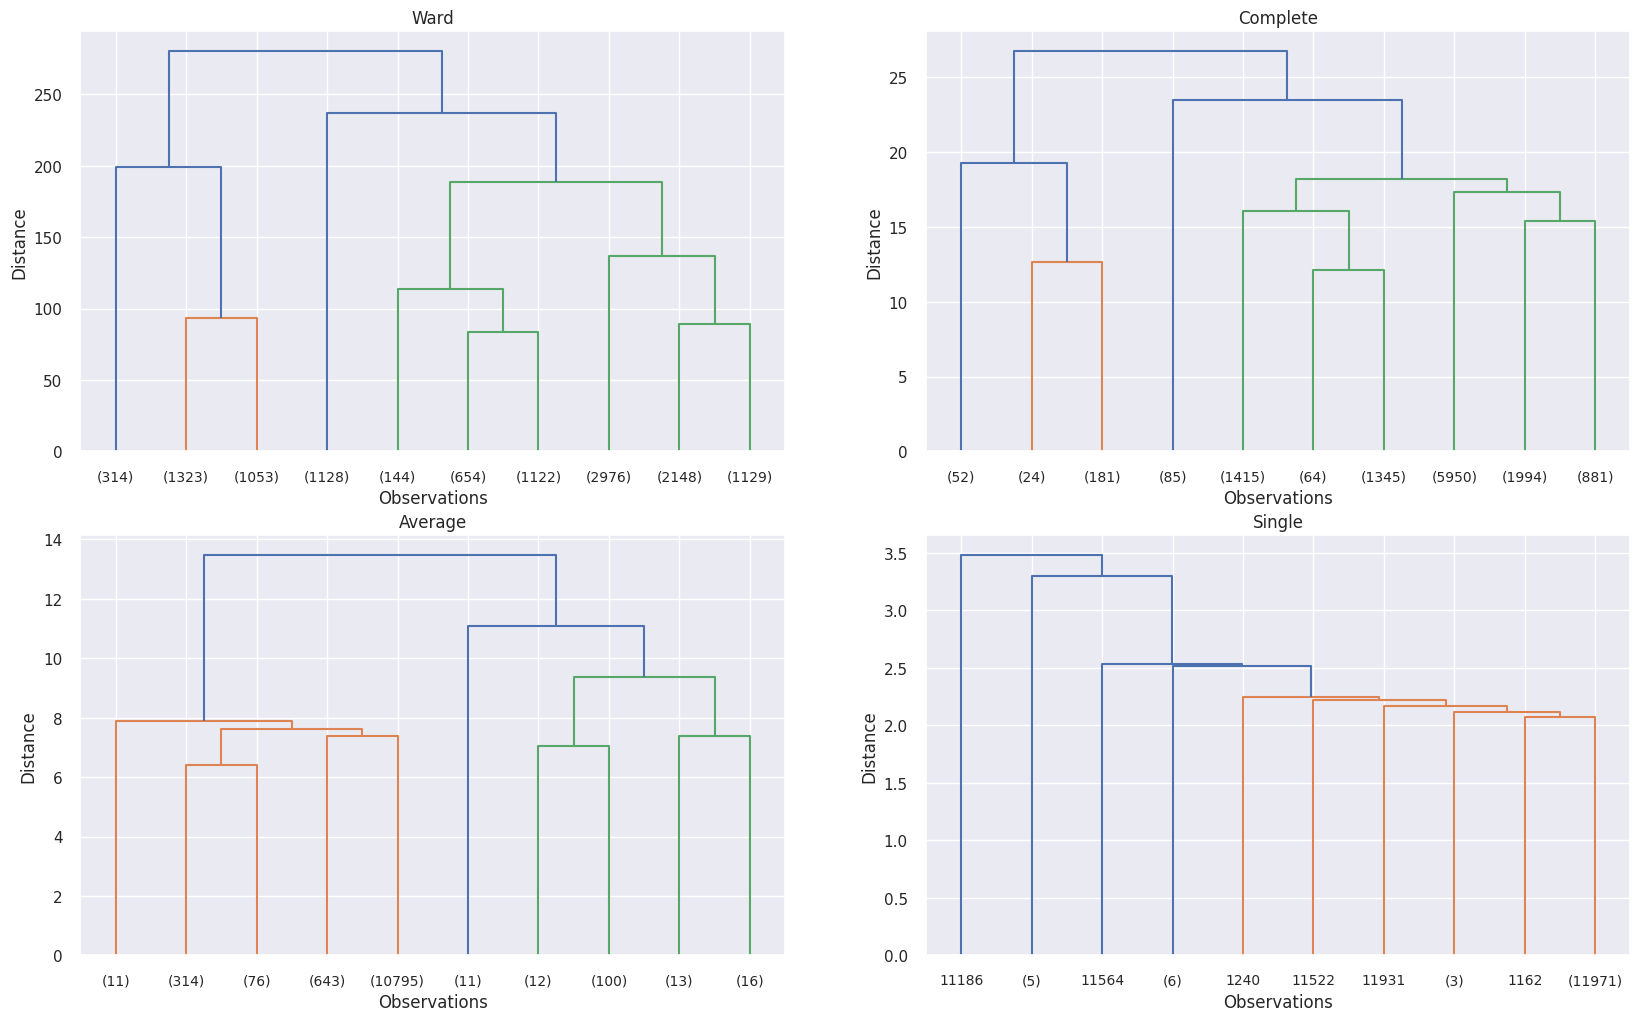

In [85]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [86]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k, linkage="ward")
    model.fit_predict(hc_df_famd)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(hc_df_famd, model.labels_)}')

Silhouette Score for 2 clusters: 0.2856160179161825
Silhouette Score for 3 clusters: 0.2828780218052464
Silhouette Score for 4 clusters: 0.25152559129083785
Silhouette Score for 5 clusters: 0.24643254890403554
Silhouette Score for 6 clusters: 0.1865025401818143
Silhouette Score for 7 clusters: 0.19259438299039855
Silhouette Score for 8 clusters: 0.18241371953796387
Silhouette Score for 9 clusters: 0.17476112314253084


In [87]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3,
                                linkage="ward")
clusters = model.fit_predict(hc_df_famd)

In [88]:
clusters = model.labels_

hc_df_famd['labels'] = clusters
hc_df_famd.head()

component_1  component_2  component_3  labels
0    -1.497521     5.081133    -0.527538       2
1     1.439709    -1.176549    -2.161325       0
2     8.430868     2.900355     1.623292       0
3     2.071908    -2.872975     1.158924       0
4    -1.236605     5.712880     0.022103       2

In [89]:
import plotly.express as px
fig = px.scatter_3d(hc_df_famd,
                    x='component_1',
                    y='component_2',
                    z='component_3',
                    color='labels'
                   )
fig.update_coloraxes(showscale=False)
fig.show();

## Cluster observation

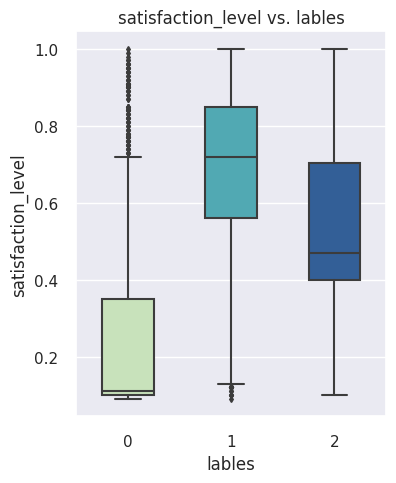

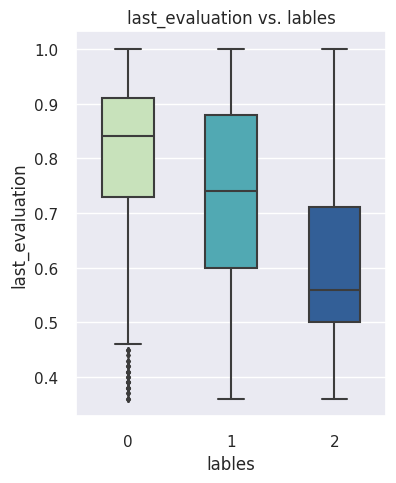

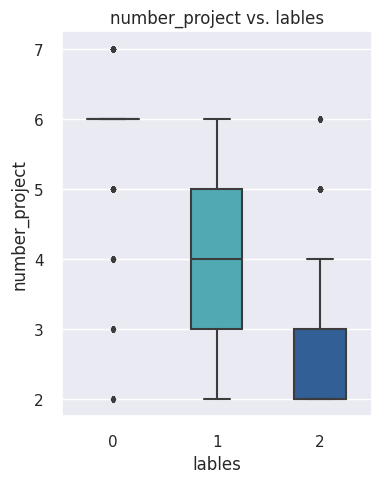

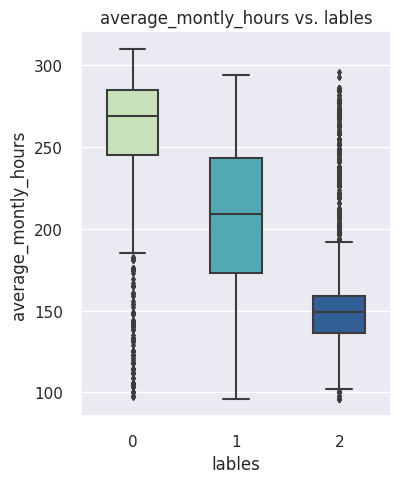

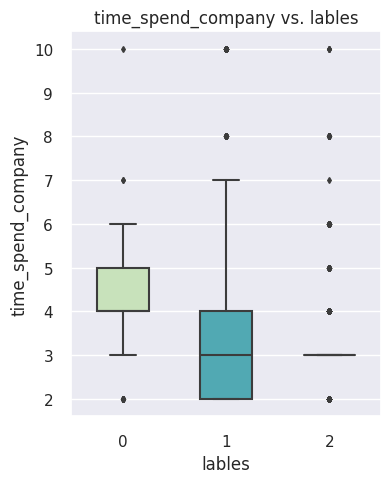

In [90]:
# store numerical columns names except target feature and categorical features
columns = list(K_mean2.select_dtypes(include='number').columns)

columns.remove('left') # binary
columns.remove('Work_accident') # binary
columns.remove('promotion_last_5years') #binary
columns.remove('lables')
# columns.remove('departments') # categorical
# columns.remove('salary') # categorical

# columns

for column in columns:
    plt.figure(figsize=(4, 5))
    sns.boxplot(data=K_mean2, width=0.5, fliersize=3, y=column,
                x='lables', palette = 'YlGnBu')
    plt.title(f'{column} vs. lables')
    plt.show()
# No many outlier

In [91]:
K_mean_summary = K_mean2.groupby(['lables']).mean().round(2)
K_mean_summary
# satisfaction_level , number_project , average_montly_hours , time_spend_company , left

satisfaction_level  last_evaluation  number_project  \
lables                                                        
0                     0.27             0.79            5.80   
1                     0.69             0.74            3.89   
2                     0.55             0.61            2.69   

        average_montly_hours  time_spend_company  Work_accident  left  \
lables                                                                  
0                     252.02                4.22           0.08  0.61   
1                     206.59                3.33           0.18  0.07   
2                     156.55                3.17           0.08  0.38   

        promotion_last_5years  
lables                         
0                        0.00  
1                        0.02  
2                        0.01

In [92]:
l=K_mean2.groupby(['lables'])['left'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
l

lables  left
0       1       61.4%
        0       38.6%
1       0       93.5%
        1        6.5%
2       0       61.8%
        1       38.2%
Name: left, dtype: object

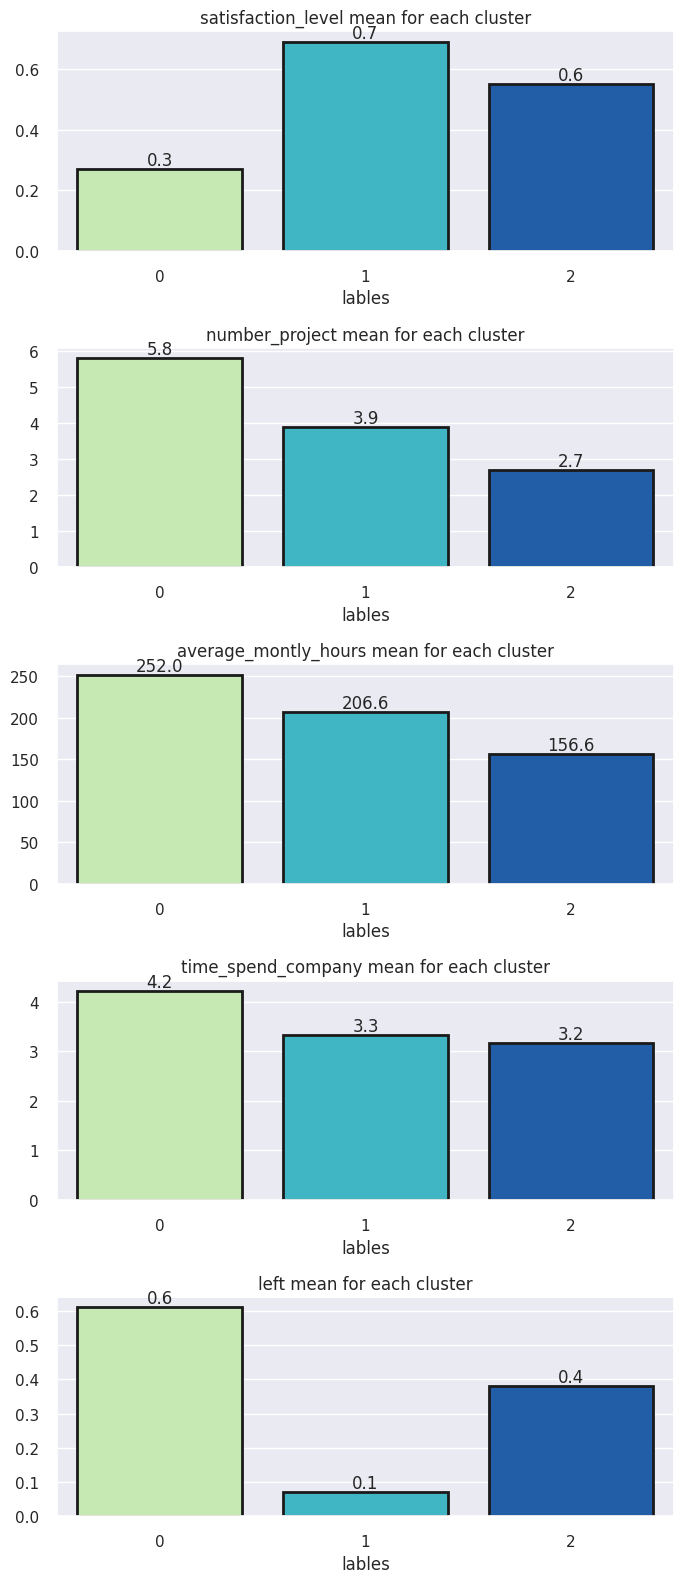

In [93]:
plt.figure(figsize=(7, 16))
plt.subplot(511)
ax = sns.barplot(x = K_mean_summary['satisfaction_level'].index,
                  y = K_mean_summary['satisfaction_level'].values,
                 saturation=1, edgecolor='k',linewidth=2,palette='YlGnBu')
ax.bar_label(ax.containers[0], fmt="%.1f")
plt.title('satisfaction_level mean for each cluster')
plt.subplot(512)
ax = sns.barplot(x=K_mean_summary['number_project'].index,
                 y=K_mean_summary['number_project'].values,
                 saturation=1, edgecolor='k',linewidth=2,palette='YlGnBu')
ax.bar_label(ax.containers[0], fmt="%.1f")
plt.title('number_project mean for each cluster')
plt.subplot(513)
ax = sns.barplot(x=K_mean_summary['average_montly_hours'].index,
                 y=K_mean_summary['average_montly_hours'].values,
                 saturation=1, edgecolor='k',linewidth=2,palette='YlGnBu')
ax.bar_label(ax.containers[0], fmt="%.1f")
plt.title('average_montly_hours mean for each cluster')
plt.subplot(514)
ax = sns.barplot(x=K_mean_summary['time_spend_company'].index,
                 y=K_mean_summary['time_spend_company'].values,
                 saturation=1, edgecolor='k',linewidth=2,palette='YlGnBu')
ax.bar_label(ax.containers[0], fmt="%.1f")
plt.title('time_spend_company mean for each cluster')
plt.subplot(515)
ax = sns.barplot(x=K_mean_summary['left'].index, y=K_mean_summary['left'].values,
                 saturation=1, edgecolor='k',linewidth=2,palette='YlGnBu')
ax.bar_label(ax.containers[0], fmt="%.1f")
plt.title('left mean for each cluster')
plt.tight_layout()
plt.show();

* Cluster 0: We can notice that the satisfaction_level is the lowest, and the mean of the number of the projects, average_montly_hours, time_spend_company are the highest. When we compare the actual labels with the clusters we can say the mean of those who left is very high for cluster 0. <br><br>
* Cluster 1 : We can notice that the satisfaction_level is the highest, average_montly_hours, time_spend_company, and the number of projects are within the average. But this cluster has the lowest mean of employees who left, so they are satisfied with their positions. <br><br>
* Cluster 2 :  We can notice that the satisfaction_level is good enough, they have few projects, and work lower than the average time_spend_company and average_montly_hours. the left mean for this cluster is moderate so they may overlap in this cluster.

## 4. Predictive Model Building

### Preprocessing

In [94]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [95]:
df['time_spend_company'].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

 ## Train | Test Splitting

In [96]:
# splitting X and y
X = df.drop(columns = ['left'])
y = df['left']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [98]:
X_train.shape

(9592, 9)

In [99]:
one_hot_columns = ['departments', 'Work_accident', 'promotion_last_5years']
ordinal_columns = ['salary','number_project', 'time_spend_company']

sal_order = ['low', 'medium', 'high']
project_order = [2,3,4,5,6,7]
time_order = [2,3,4,5,6,7,8,10]
ordinal = [sal_order, project_order, time_order]

In [100]:
#column transformer

column_trans = make_column_transformer((
               OneHotEncoder( handle_unknown='ignore',
                              sparse_output=False),
                              one_hot_columns),
              (OrdinalEncoder(categories=ordinal,
                              handle_unknown='use_encoded_value',
                              unknown_value=-1),
                              ordinal_columns),
                              remainder = 'passthrough')

In [101]:
# column transformer for tree-based
# tree-based models do not need one-hot encoding
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value',
                         unknown_value=-1)

all_columns = ['departments', 'Work_accident', 'promotion_last_5years','salary','number_project', 'time_spend_company']
column_trans2 = make_column_transformer((ord_enc, all_columns),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

________________________________________________________________________________________________________________________________________________________________________________________________

## Scoring

In [102]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    '''
    Description:
    This function gets a model, train and test sets and return
    the confusion matrix and classification report

    INPUT:
    model - fitted model
    X_train - input features for the training set
    y_train - target values for training set
    X_test - input features for the testing set
    y_test - target values for testing set

    RETURN:
    Nothing

    '''
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [103]:
f1 = make_scorer(f1_score, average=None, labels=[1])

precision = make_scorer(precision_score, average=None, labels=[1])

recall= make_scorer(recall_score, average=None, labels=[1])


scoring = {'f1_1': f1,
           'precision_1': precision,
           'recall_1': recall}

In [104]:
def precision_recall_plot(model,X_test, y_test):
  y_pred_proba = model.predict_proba(X_test)

  plot_precision_recall(y_test, y_pred_proba)
  plt.show();

#### Min Max Scaler

In [105]:
# our scaller
sc = MinMaxScaler()

________________________________________________________________________________________________________________________________________________________________

### Classification Algorithms
 - Try at least 4 ML/DL algorithms.

#### Logistic Regression Model

In [106]:
# Logistic regression model
logistic_model = LogisticRegression(max_iter=1000,class_weight="balanced", random_state=42)
# setting max iteration to 1000 to make sure solvers have enough iterations to converge
log_pipe = make_pipeline(column_trans, sc, logistic_model)

log_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['departments',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high'],
                                                                             [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7],
                                                                             [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              10]],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary', 'number_project',
                                                   'time_spend_company'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

#### Model Evaluation

In [107]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[6080 1919]
 [ 274 1319]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7999
           1       0.41      0.83      0.55      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.70      9592
weighted avg       0.87      0.77      0.80      9592


Test_Set
[[1542  459]
 [  61  337]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2001
           1       0.42      0.85      0.56       398

    accuracy                           0.78      2399
   macro avg       0.69      0.81      0.71      2399
weighted avg       0.87      0.78      0.81      2399



* precision score for class one is bad we need to improve it
* Recall is good for class 1

In [108]:
logistic_model.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

LR tunning

In [109]:
def objective(trial):
    """ This function create a new trial to find the optimal hyperparameters

    Args:
        trial : optuna object


    Returns:
        float: score
    """
    # parameters to be searched
    C = trial.suggest_float('penalty_C', 0.01, 1.0, log=True)
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs','sag','newton-cholesky'])
    logistic_model = LogisticRegression(max_iter=1000,class_weight="balanced",
                                        C=C, solver=solver, random_state=42)

    log_pipe = make_pipeline(column_trans, sc, logistic_model)

    log_pipe.fit(X_train, y_train)

    scores = cross_validate(log_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
    # scoring recall
    return scores['train_precision_1'].mean()

study = optuna.create_study(direction='maximize', study_name='Logistic regression tunning')
study.optimize(objective, n_trials=10) # reduce trial

print('Best trial: {}'.format(study.best_trial.number))
print('train_precision_1: {}'.format(study.best_trial.value))
print('Best hyperparameters: {}'.format(study.best_params))

[I 2023-12-07 12:09:37,465] A new study created in memory with name: Logistic regression tunning
[I 2023-12-07 12:09:39,999] Trial 0 finished with value: 0.40425101028471255 and parameters: {'penalty_C': 0.20947215274843842, 'solver': 'sag'}. Best is trial 0 with value: 0.40425101028471255.
[I 2023-12-07 12:09:41,302] Trial 1 finished with value: 0.4061913631646199 and parameters: {'penalty_C': 0.45384695007314685, 'solver': 'sag'}. Best is trial 1 with value: 0.4061913631646199.
[I 2023-12-07 12:09:41,882] Trial 2 finished with value: 0.3767083359417268 and parameters: {'penalty_C': 0.010878463125863233, 'solver': 'liblinear'}. Best is trial 1 with value: 0.4061913631646199.
[I 2023-12-07 12:09:43,297] Trial 3 finished with value: 0.40698600994265555 and parameters: {'penalty_C': 0.6655364565349888, 'solver': 'sag'}. Best is trial 3 with value: 0.40698600994265555.
[I 2023-12-07 12:09:44,194] Trial 4 finished with value: 0.3928005982965231 and parameters: {'penalty_C': 0.0385859231412

Best trial: 8
train_precision_1: 0.40713580009255307
Best hyperparameters: {'penalty_C': 0.7306895951885207, 'solver': 'sag'}


In [110]:
C = study.best_params['penalty_C']
solver = study.best_params['solver']

In [111]:
logistic_model = LogisticRegression(max_iter=1000,class_weight="balanced",
                                    C=C, solver=solver, random_state=42)
log_pipe = make_pipeline(column_trans, sc, logistic_model)

log_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['departments',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high'],
                                                                             [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7],
                                                                             [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              10]],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary', 'number_project',
                                                   'time_spend_company'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.7306895951885207,
                                    class_weight='balanced', max_iter=1000,
                                    random_state=42, solver='sag'))])

In [112]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[6083 1916]
 [ 273 1320]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7999
           1       0.41      0.83      0.55      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.70      9592
weighted avg       0.87      0.77      0.80      9592


Test_Set
[[1541  460]
 [  61  337]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2001
           1       0.42      0.85      0.56       398

    accuracy                           0.78      2399
   macro avg       0.69      0.81      0.71      2399
weighted avg       0.87      0.78      0.81      2399



In [113]:
scores = cross_validate(log_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_1            0.546071
train_f1_1           0.545681
test_precision_1     0.407538
train_precision_1    0.407136
test_recall_1        0.828011
train_recall_1       0.827160
dtype: float64

There is no overfitting, but the scores for precision is too low

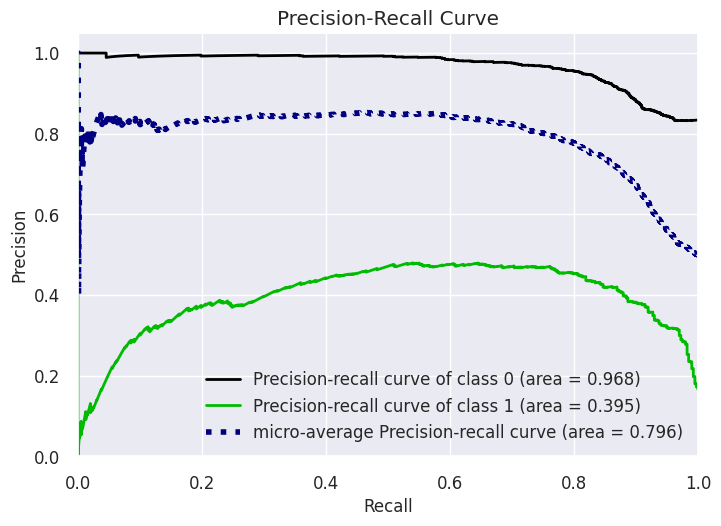

In [114]:
precision_recall_plot(log_pipe,X_test, y_test)

In [115]:
# save and store the scores to visualize them later
y_pred = log_pipe.predict(X_test)
y_pred_proba= log_pipe.predict_proba(X_test)[:,1]

log_AP= average_precision_score(y_test, y_pred_proba)
log_recall = recall_score(y_test, y_pred)
log_f1 = f1_score(y_test,y_pred)

#### Naive Bayes Model

In [116]:
# Naive_bayes model
Naive_model = BernoulliNB(alpha=1.0)

naive_pipe = make_pipeline(column_trans, sc, Naive_model)

naive_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['departments',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high'],
                                                                             [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7],
                                                                             [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              10]],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary', 'number_project',
                                                   'time_spend_company'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('bernoullinb', BernoulliNB())])

#### Model Evaluation

In [117]:
eval_metric(naive_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[7663  336]
 [ 885  708]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7999
           1       0.68      0.44      0.54      1593

    accuracy                           0.87      9592
   macro avg       0.79      0.70      0.73      9592
weighted avg       0.86      0.87      0.86      9592


Test_Set
[[1914   87]
 [ 193  205]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2001
           1       0.70      0.52      0.59       398

    accuracy                           0.88      2399
   macro avg       0.81      0.74      0.76      2399
weighted avg       0.87      0.88      0.88      2399



The recall score for class 1 is low but can be improved

NV tunning

In [118]:
def objective(trial):
    """ This function create a new trial to find the optimal hyperparameters

    Args:
        trial : optuna object


    Returns:
        float: score
    """
    # parameters to be searched
    alpha = trial.suggest_float('alpha', 0.1, 1.0, log=True)
    fit_prior = trial.suggest_categorical('fit_prior', [True, False])
    Naive_model = BernoulliNB(alpha=alpha, fit_prior=fit_prior)
    naive_pipe = make_pipeline(column_trans, sc, Naive_model)
    naive_pipe.fit(X_train, y_train)


    scores = cross_validate(naive_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
    # scoring recall
    return scores['train_recall_1'].mean()

study = optuna.create_study(direction='maximize', study_name='Naive_model tunning')
study.optimize(objective, n_trials=10) # reduce trial

print('Best trial: {}'.format(study.best_trial.number))
print('train_recall_1: {}'.format(study.best_trial.value))
print('Best hyperparameters: {}'.format(study.best_params))

[I 2023-12-07 12:10:26,269] A new study created in memory with name: Naive_model tunning
[I 2023-12-07 12:10:26,806] Trial 0 finished with value: 0.7226063081713077 and parameters: {'alpha': 0.20420573444323892, 'fit_prior': False}. Best is trial 0 with value: 0.7226063081713077.
[I 2023-12-07 12:10:27,306] Trial 1 finished with value: 0.7229551778607655 and parameters: {'alpha': 0.5385618115940786, 'fit_prior': False}. Best is trial 1 with value: 0.7229551778607655.
[I 2023-12-07 12:10:27,815] Trial 2 finished with value: 0.44297929556450316 and parameters: {'alpha': 0.4852018939423006, 'fit_prior': True}. Best is trial 1 with value: 0.7229551778607655.
[I 2023-12-07 12:10:28,301] Trial 3 finished with value: 0.44297929556450316 and parameters: {'alpha': 0.659714823739457, 'fit_prior': True}. Best is trial 1 with value: 0.7229551778607655.
[I 2023-12-07 12:10:28,843] Trial 4 finished with value: 0.7230249128677391 and parameters: {'alpha': 0.5493404413912307, 'fit_prior': False}. Best

Best trial: 6
train_recall_1: 0.7231644315453336
Best hyperparameters: {'alpha': 0.8247119364527178, 'fit_prior': False}


In [119]:
alpha = study.best_params['alpha']
fit_prior = study.best_params['fit_prior']

In [120]:
Naive_model = BernoulliNB(alpha=alpha, fit_prior=fit_prior)
naive_pipe = make_pipeline(column_trans, sc, Naive_model)
naive_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['departments',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high'],
                                                                             [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7],
                                                                             [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              10]],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary', 'number_project',
                                                   'time_spend_company'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('bernoullinb',
                 BernoulliNB(alpha=0.8247119364527178, fit_prior=False))])

In [121]:
eval_metric(naive_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[5859 2140]
 [ 449 1144]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      7999
           1       0.35      0.72      0.47      1593

    accuracy                           0.73      9592
   macro avg       0.64      0.73      0.64      9592
weighted avg       0.83      0.73      0.76      9592


Test_Set
[[1467  534]
 [  95  303]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      2001
           1       0.36      0.76      0.49       398

    accuracy                           0.74      2399
   macro avg       0.65      0.75      0.66      2399
weighted avg       0.84      0.74      0.77      2399



The recall improved but precision has dropped down

In [122]:
scores = cross_validate(naive_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_1            0.465679
train_f1_1           0.467669
test_precision_1     0.344767
train_precision_1    0.345637
test_recall_1        0.718149
train_recall_1       0.723164
dtype: float64

* The scores for this model is very low

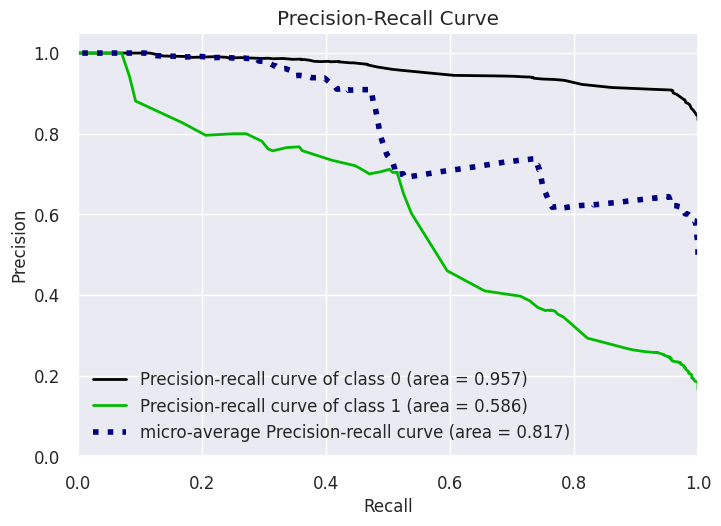

In [123]:
precision_recall_plot(naive_pipe,X_test, y_test)

In [124]:
# save and store the scores to visualize them later
y_pred = naive_pipe.predict(X_test)
y_pred_proba= naive_pipe.predict_proba(X_test)[:,1]

naive_AP= average_precision_score(y_test, y_pred_proba)
naive_recall = recall_score(y_test, y_pred)
naive_f1 = f1_score(y_test,y_pred)

_________________________________________________________________________________________________________________________________________________________________

## Tree-based algorithms

For tree based model we will use transformer 2 (no one hot encoding and not specifiying the order)

### Random Forest

In [125]:
# Random Forest model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_pipe = make_pipeline(column_trans2, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments',
                                                   'Work_accident',
                                                   'promotion_last_5years',
                                                   'salary', 'number_project',
                                                   'time_spend_company'])],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

#### Model Evaluation

In [130]:
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[7999    0]
 [   0 1593]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592


Test_Set
[[1997    4]
 [  30  368]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.92      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399



In [127]:
scores = cross_validate(rf_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_1            0.946844
train_f1_1           1.000000
test_precision_1     0.989815
train_precision_1    1.000000
test_recall_1        0.907704
train_recall_1       1.000000
dtype: float64

Great results but there is overfitting

In [128]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

RF tunning

In [129]:
def objective(trial):
    """ This function create a new trial to find the optimal hyperparameters

    Args:
        trial : optuna object


    Returns:
        float: score
    """
    # parameters to be searched
    max_depth = trial.suggest_int('depth', 3,7)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    n_estimators = trial.suggest_int('no. of est', 50,500)

    rf = RandomForestClassifier(random_state=42, class_weight='balanced',
                                max_depth=max_depth,criterion=criterion,
                                n_estimators=n_estimators)
    rf_pipe = make_pipeline(column_trans2, rf)
    rf_pipe.fit(X_train, y_train)

    scores = cross_validate(rf_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
    # scoring recall
    return scores['train_recall_1'].mean() # for recall

study = optuna.create_study(direction='maximize', study_name='RF tunning')
study.optimize(objective, n_trials=10) # reduce trial

print('Best trial: {}'.format(study.best_trial.number))
print('train_recall_1: {}'.format(study.best_trial.value))
print('Best hyperparameters: {}'.format(study.best_params))

[I 2023-12-07 12:11:06,902] A new study created in memory with name: RF tunning
[I 2023-12-07 12:11:27,118] Trial 0 finished with value: 0.9312967596823626 and parameters: {'depth': 7, 'criterion': 'gini', 'no. of est': 327}. Best is trial 0 with value: 0.9312967596823626.
[I 2023-12-07 12:11:37,242] Trial 1 finished with value: 0.9246704254468053 and parameters: {'depth': 6, 'criterion': 'log_loss', 'no. of est': 166}. Best is trial 0 with value: 0.9312967596823626.
[I 2023-12-07 12:11:46,859] Trial 2 finished with value: 0.9236240596966698 and parameters: {'depth': 4, 'criterion': 'gini', 'no. of est': 194}. Best is trial 0 with value: 0.9312967596823626.
[I 2023-12-07 12:12:03,892] Trial 3 finished with value: 0.9209039077882275 and parameters: {'depth': 5, 'criterion': 'log_loss', 'no. of est': 308}. Best is trial 0 with value: 0.9312967596823626.
[I 2023-12-07 12:12:08,135] Trial 4 finished with value: 0.9230661796408819 and parameters: {'depth': 4, 'criterion': 'gini', 'no. of es

Best trial: 0
train_recall_1: 0.9312967596823626
Best hyperparameters: {'depth': 7, 'criterion': 'gini', 'no. of est': 327}


In [131]:
max_depth = study.best_params['depth']
criterion =  study.best_params['criterion']
n_estimators = study.best_params['no. of est']

In [132]:
rf = RandomForestClassifier(
        random_state=42,
        max_depth=max_depth,
        class_weight='balanced',
        criterion=criterion,
        n_estimators=n_estimators)
rf_pipe = make_pipeline(column_trans2, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments',
                                                   'Work_accident',
                                                   'promotion_last_5years',
                                                   'salary', 'number_project',
                                                   'time_spend_company'])],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        n_estimators=327, random_state=42))])

In [133]:
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[7963   36]
 [ 114 1479]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.98      0.93      0.95      1593

    accuracy                           0.98      9592
   macro avg       0.98      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592


Test_Set
[[1989   12]
 [  29  369]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.97      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



we obtained similar results with less complex trees structure

In [134]:
scores = cross_validate(rf_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_1            0.940265
train_f1_1           0.951607
test_precision_1     0.967712
train_precision_1    0.972828
test_recall_1        0.914615
train_recall_1       0.931297
dtype: float64

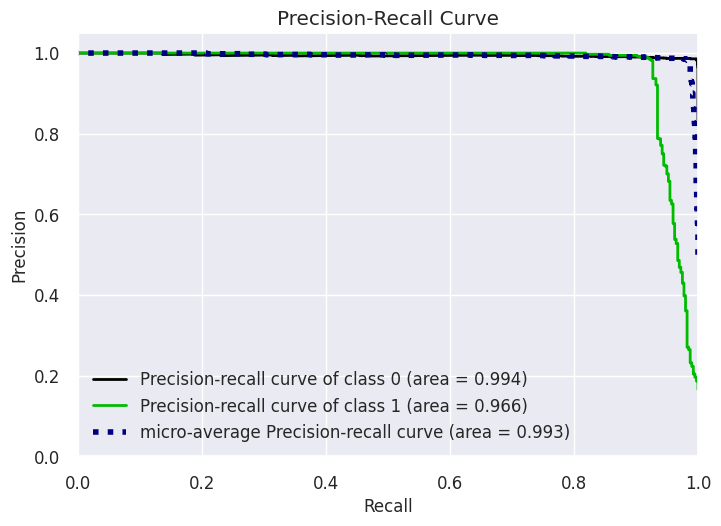

In [135]:
precision_recall_plot(rf_pipe,X_test, y_test)

We almost have perfect classifier

In [136]:
# save and store the scores to visualize them later
y_pred = rf_pipe.predict(X_test)
y_pred_proba= rf_pipe.predict_proba(X_test)[:,1]

rf_AP= average_precision_score(y_test, y_pred_proba)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test,y_pred)

#### XGBoost Model

In [137]:
# XGBoost model
xgb_model = XGBClassifier()

xgb_pipe = make_pipeline(column_trans2, xgb_model)

xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments',
                                                   'Work_accident',
                                                   'promotion_last_5years',
                                                   'salary', 'number_project',
                                                   'time_spend_company'])],
                                   verbose_feature_names_out=False)),
                ('xgbclassifier',
                 XGBClassifier(b...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

#### Model Evaluation

In [138]:
eval_metric(xgb_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[7993    6]
 [  33 1560]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      0.98      0.99      1593

    accuracy                           1.00      9592
   macro avg       1.00      0.99      0.99      9592
weighted avg       1.00      1.00      1.00      9592


Test_Set
[[1985   16]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.96      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



In [139]:
scores = cross_validate(xgb_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_1            0.945370
train_f1_1           0.991128
test_precision_1     0.974282
train_precision_1    0.996476
test_recall_1        0.918381
train_recall_1       0.985841
dtype: float64

Slightly overfitted

In [140]:
def objective(trial):
    """ This function create a new trial to find the optimal hyperparameters

    Args:
        trial : optuna object


    Returns:
        float: score
    """
    # parameters to be searched
    max_depth = trial.suggest_int('depth', 3,6)
    subsample  = trial.suggest_uniform('subsample',  0.6, 1.0)
    grow_policy = trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])
    xgb_model = XGBClassifier(max_depth = max_depth, subsample=subsample, grow_policy=grow_policy)
    xgb_pipe = make_pipeline(column_trans2, xgb_model)
    xgb_pipe.fit(X_train, y_train)

    scores = cross_validate(xgb_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
    # scoring recall
    return scores['train_recall_1'].mean() # for recall

study = optuna.create_study(direction='maximize', study_name='XGboost tunning')
study.optimize(objective, n_trials=10) # reduce trial

print('Best trial: {}'.format(study.best_trial.number))
print('train_recall_1: {}'.format(study.best_trial.value))
print('Best hyperparameters: {}'.format(study.best_params))

[I 2023-12-07 12:15:28,098] A new study created in memory with name: XGboost tunning
[I 2023-12-07 12:15:29,338] Trial 0 finished with value: 0.9340866465977784 and parameters: {'depth': 3, 'subsample': 0.644490088507318, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.9340866465977784.
[I 2023-12-07 12:15:30,716] Trial 1 finished with value: 0.9704956197850818 and parameters: {'depth': 5, 'subsample': 0.9644200170413607, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.9704956197850818.
[I 2023-12-07 12:15:32,129] Trial 2 finished with value: 0.9670774365158387 and parameters: {'depth': 5, 'subsample': 0.9955538900384537, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.9704956197850818.
[I 2023-12-07 12:15:33,440] Trial 3 finished with value: 0.9497101106514018 and parameters: {'depth': 4, 'subsample': 0.6139022584938859, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.9704956197850818.
[I 2023-12-07 12:15:34,571] Trial 4 finished with value:

Best trial: 5
train_recall_1: 0.9945592095466397
Best hyperparameters: {'depth': 6, 'subsample': 0.7349637197689273, 'grow_policy': 'depthwise'}


In [141]:
max_depth = study.best_params['depth']
subsample =  study.best_params['subsample']
grow_policy = study.best_params['grow_policy']

In [142]:
xgb_model = XGBClassifier(max_depth=max_depth, subsample=subsample, grow_policy=grow_policy,eta=0.1)
xgb_pipe = make_pipeline(column_trans2, xgb_model)
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments',
                                                   'Work_accident',
                                                   'promotion_last_5years',
                                                   'salary', 'number_project',
                                                   'time_spend_company'])],
                                   verbose_feature_names_out=False)),
                ('xgbclassifier',
                 XGBClassifier(b...
                               eval_metric=None, feature_types=None, gamma=None,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [143]:
eval_metric(xgb_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[7979   20]
 [ 100 1493]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.94      0.96      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592


Test_Set
[[1991   10]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.97      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



In [144]:
scores = cross_validate(xgb_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_1            0.947583
train_f1_1           0.963717
test_precision_1     0.976865
train_precision_1    0.989420
test_recall_1        0.920263
train_recall_1       0.939317
dtype: float64

very close results on the train and test sets

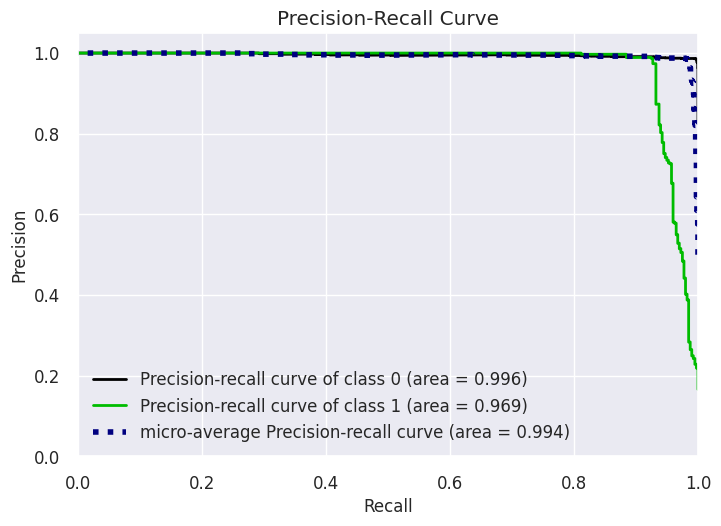

In [145]:
precision_recall_plot(xgb_pipe,X_test, y_test)

In [146]:
# save and store the scores to visualize them later
y_pred = xgb_pipe.predict(X_test)
y_pred_proba= xgb_pipe.predict_proba(X_test)[:,1]

xgb_AP= average_precision_score(y_test, y_pred_proba)
xgb_recall = recall_score(y_test, y_pred)
xgb_f1 = f1_score(y_test,y_pred)

#### Model Building

### Deep learning

In [147]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.utils import class_weight
import warnings
import os

warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
sns.set_style('whitegrid')

In [148]:
# to have fixed results everytime we run the code, we must set the same seed number for all packages
SEED = 42
import os
import random

def set_seed():
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
    tf.keras.utils.set_random_seed(SEED)
    os.environ["PYTHONHASHSEED"] = str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

## Data splitting

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size = 0.1,
                                                  stratify = y_train, random_state = 42)

In [150]:
X_train = column_trans.fit_transform(X_train)
X_val = column_trans.transform(X_val)
X_test = column_trans.transform(X_test)

In [151]:
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [152]:
set_seed()

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [153]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5996110030564046, 1: 3.0097629009762903}

In [154]:
early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1, patience=5)

In [155]:
model.fit(x = X_train, y = y_train, validation_data = (X_val,y_val),
           batch_size = 128, epochs = 100, class_weight=class_weights, callbacks=[early_stop])

Epoch 1/100
68/68 [==============================] - 7s 7ms/step - loss: 0.6750 - recall: 0.3647 - val_loss: 0.6033 - val_recall: 0.5157
Epoch 2/100
68/68 [==============================] - 0s 4ms/step - loss: 0.6183 - recall: 0.6102 - val_loss: 0.5432 - val_recall: 0.6981
Epoch 3/100
68/68 [==============================] - 0s 4ms/step - loss: 0.5458 - recall: 0.7545 - val_loss: 0.5342 - val_recall: 0.8428
Epoch 4/100
68/68 [==============================] - 0s 4ms/step - loss: 0.4724 - recall: 0.8410 - val_loss: 0.4738 - val_recall: 0.8868
Epoch 5/100
68/68 [==============================] - 0s 4ms/step - loss: 0.4135 - recall: 0.8842 - val_loss: 0.4400 - val_recall: 0.9119
Epoch 6/100
68/68 [==============================] - 0s 4ms/step - loss: 0.3669 - recall: 0.9086 - val_loss: 0.3908 - val_recall: 0.9245
Epoch 7/100
68/68 [==============================] - 0s 4ms/step - loss: 0.3303 - recall: 0.9212 - val_loss: 0.3266 - val_recall: 0.9119
Epoch 8/100
68/68 [======================

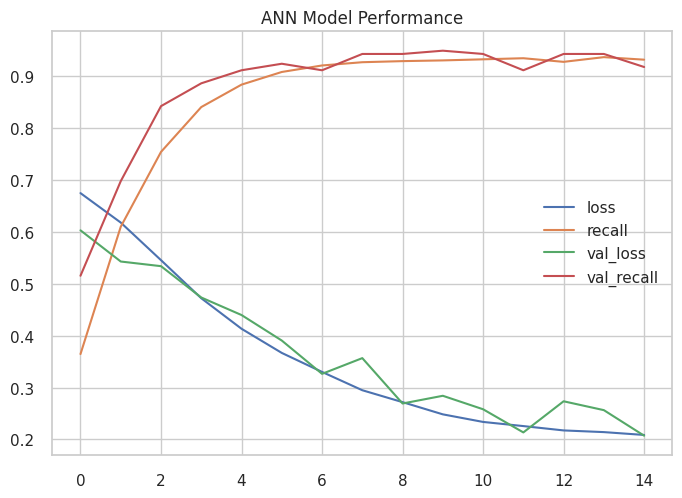

In [156]:
res = pd.DataFrame(model.history.history)
res.plot()
plt.title('ANN Model Performance');

In [157]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.18904824554920197
recall :  0.927135705947876


In [158]:
print("-----------------TEST SET------------------")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("-----------------TRAIN SET------------------")
y_predT = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_predT))
print(classification_report(y_train, y_predT))

-----------------TEST SET------------------
75/75 [==============================] - 0s 2ms/step
[[1877  124]
 [  29  369]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2001
           1       0.75      0.93      0.83       398

    accuracy                           0.94      2399
   macro avg       0.87      0.93      0.89      2399
weighted avg       0.95      0.94      0.94      2399

-----------------TRAIN SET------------------
270/270 [==============================] - 1s 2ms/step
[[6708  490]
 [ 103 1331]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      7198
           1       0.73      0.93      0.82      1434

    accuracy                           0.93      8632
   macro avg       0.86      0.93      0.89      8632
weighted avg       0.94      0.93      0.93      8632



The results are good but the precision can be improved

In [159]:
early_stop = EarlyStopping(monitor="val_precision", mode="max", verbose=1, patience=5)

In [160]:
set_seed()

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Precision"])

model.fit(x = X_train, y = y_train, validation_data = (X_val,y_val),
           batch_size = 128, epochs = 100, class_weight=class_weights, callbacks=[early_stop])

Epoch 1/100
68/68 [==============================] - 1s 7ms/step - loss: 0.6750 - precision: 0.2649 - val_loss: 0.6033 - val_precision: 0.3489
Epoch 2/100
68/68 [==============================] - 0s 4ms/step - loss: 0.6183 - precision: 0.3708 - val_loss: 0.5432 - val_precision: 0.3700
Epoch 3/100
68/68 [==============================] - 0s 4ms/step - loss: 0.5458 - precision: 0.3909 - val_loss: 0.5342 - val_precision: 0.3691
Epoch 4/100
68/68 [==============================] - 0s 4ms/step - loss: 0.4724 - precision: 0.4255 - val_loss: 0.4738 - val_precision: 0.4273
Epoch 5/100
68/68 [==============================] - 0s 5ms/step - loss: 0.4135 - precision: 0.4589 - val_loss: 0.4400 - val_precision: 0.4421
Epoch 6/100
68/68 [==============================] - 0s 4ms/step - loss: 0.3669 - precision: 0.4838 - val_loss: 0.3908 - val_precision: 0.4667
Epoch 7/100
68/68 [==============================] - 0s 4ms/step - loss: 0.3303 - precision: 0.5116 - val_loss: 0.3266 - val_precision: 0.5052

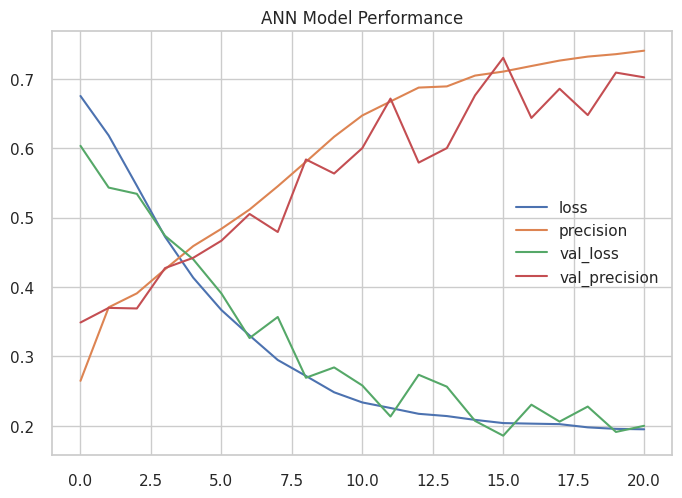

In [161]:
res = pd.DataFrame(model.history.history)
res.plot()
plt.title('ANN Model Performance');

In [162]:
print("-----------------TEST SET------------------")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("-----------------TRAIN SET------------------")
y_predT = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_predT))
print(classification_report(y_train, y_predT))

-----------------TEST SET------------------
75/75 [==============================] - 0s 2ms/step
[[1886  115]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2001
           1       0.76      0.93      0.84       398

    accuracy                           0.94      2399
   macro avg       0.87      0.94      0.90      2399
weighted avg       0.95      0.94      0.94      2399

-----------------TRAIN SET------------------
270/270 [==============================] - 0s 2ms/step
[[6747  451]
 [  97 1337]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7198
           1       0.75      0.93      0.83      1434

    accuracy                           0.94      8632
   macro avg       0.87      0.93      0.90      8632
weighted avg       0.95      0.94      0.94      8632



The precision cannot be further improved

In [163]:
# save and store the scores to visualize them later
y_pred = model.predict(X_test) > 0.5
y_pred_proba= model.predict(X_test)

ann_AP = average_precision_score(y_test, y_pred_proba)
ann_recall = recall_score(y_test, y_pred)
ann_f1 = f1_score(y_test,y_pred)

75/75 [==============================] - 0s 3ms/step


## Models comparison

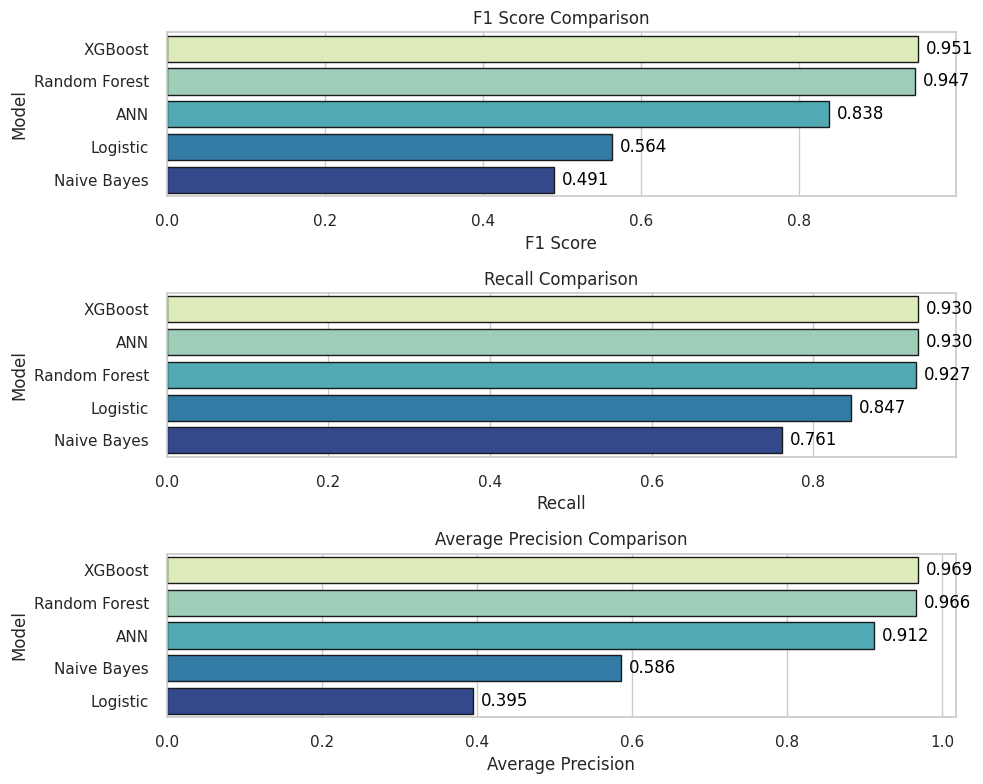

In [164]:
compare = pd.DataFrame({
    "Model": ["Logistic", "Naive Bayes", "Random Forest", "XGBoost", "ANN"],
    "F1": [log_f1, naive_f1, rf_f1, xgb_f1, ann_f1],
    "Recall": [log_recall, naive_recall, rf_recall, xgb_recall, ann_recall],
    "Average_Precision": [log_AP, naive_AP, rf_AP, xgb_AP, ann_AP]
})

plt.figure(figsize=(10, 8))


compare = compare.sort_values(by="F1", ascending=False)

plt.subplot(311)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="YlGnBu",
                 edgecolor='k',linewidth=1,)

for i, v in enumerate(compare["F1"]):
    ax.text(v + 0.01, i, f"{v:.3f}", color="black", va="center")

plt.title("F1 Score Comparison")
plt.xlabel("F1 Score")
plt.ylabel("Model")

compare = compare.sort_values(by="Recall", ascending=False)

plt.subplot(312)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="YlGnBu",
                 edgecolor='k',linewidth=1)

for i, v in enumerate(compare["Recall"]):
    ax.text(v + 0.01, i, f"{v:.3f}", color="black", va="center")

plt.title("Recall Comparison")
plt.xlabel("Recall")
plt.ylabel("Model")

compare = compare.sort_values(by="Average_Precision", ascending=False)

plt.subplot(313)
ax = sns.barplot(x="Average_Precision", y="Model", data=compare, palette="YlGnBu",
                 edgecolor='k',linewidth=1)

for i, v in enumerate(compare["Average_Precision"]):
    ax.text(v + 0.01, i, f"{v:.3f}", color="black", va="center")

plt.title("Average Precision Comparison")
plt.xlabel("Average Precision")
plt.ylabel("Model")


plt.tight_layout()
plt.show()

* XGBoost Classifier showed extremly great results in this problem for both class 0 and 1. <br>
* Due to the non-linear nature of our data logistic and naive bayse did not perform very well. <br>
* Although ANN model also showed great results the precision score for class 1 is lower than the RF and XGboost <br>
* This problem proves that ML algorithms (like Xgboost and RF) still outperforms deep learning model for tabular data. <br>

## 5. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Best Model

In [165]:
import pickle

# saving our best performing model

file = 'XGBoost_model.sav'
pickle.dump(xgb_pipe, open(file, 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___